<a href="https://colab.research.google.com/github/jescalada/Tensorflow-colabs/blob/main/01_neural_network_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to regression with neural networks in TensorFlow
There are many definitions for a regression problem. We will simplify to: Predicting a numerical variable based on a combination of other variables.

In [2]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.12.0


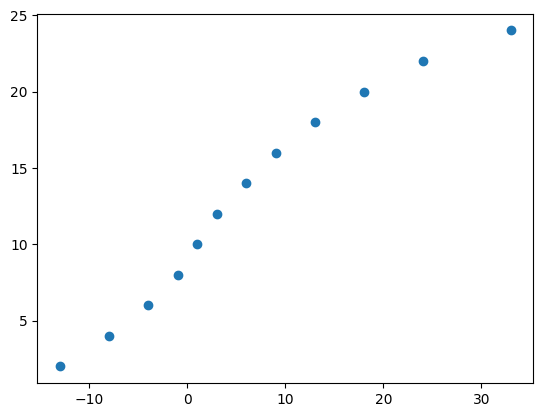

In [3]:
# Create some data to view and fit
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-13., -8., -4., -1., 1., 3., 6., 9., 13., 18., 24, 33])

# Create labels
y = np.array([2., 4., 6., 8., 10., 12., 14., 16., 18., 20., 22., 24.])

plt.scatter(X, y)

# Input and output shapes


In [4]:
# Create a demo tensor to predict the price of a house
house_info = tf.constant(["beds", "baths", "garages"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'beds', b'baths', b'garages'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

# Steps in modelling with TensorFlow
1. **Creating a model**: Define the input and output layers, as well as the hidden layers of the deep learning model
2. **Compiling the model**: Define the **loss function**, which tells the model how wrong it is, define the **optimizer** which tells the model how to improve the patterns, and define **evaluation metrics** in order to interpret the performance of the model itself
3. **Fitting the model**: Letting the model try to find patterns between X and Y (Features and labels)

In [5]:
# Set the random seed for reproducibility
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,  # Mean Absolute Error
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)



Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 18.7561 - mae: 18.7561
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 17.7010 - mae: 17.7010
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 16.7049 - mae: 16.7049
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 15.9028 - mae: 15.9028
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 15.1008 - mae: 15.1008
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 14.2988 - mae: 14.2988
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 13.6112 - mae: 13.6112
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 13.1456 - mae: 13.1456
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 12.6799 - mae: 12.6799
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 12.2143 - mae: 12.2143
Epoch 11/100
1/1 [==============================] - 0s

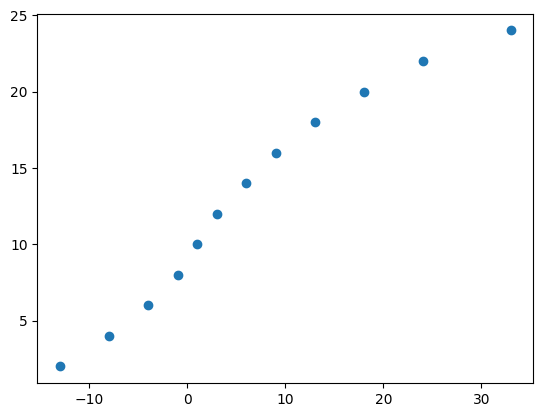

In [6]:
plt.scatter(X, y)

In [7]:
model.predict([22.])

1/1 [==============================] - 0s 85ms/step


array([[20.009197]], dtype=float32)

In [8]:
model.predict([24])

1/1 [==============================] - 0s 51ms/step


array([[21.754274]], dtype=float32)

1/1 [==============================] - 0s 34ms/step


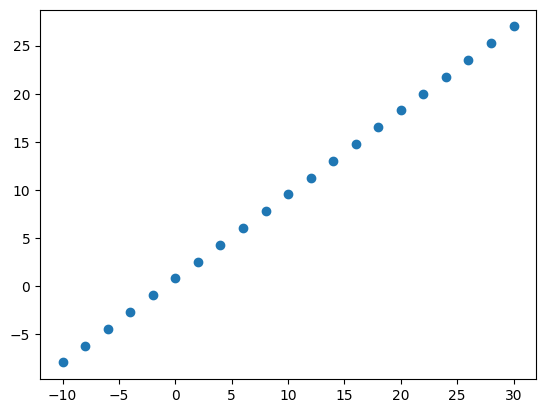

In [9]:
predictions1 = [(x, model.predict([x])) for x in range(-10, 32, 2)]
pairs = list(zip(*predictions1))
plt.scatter(pairs[0], pairs[1])

# Improving the model
Depends on the step: We can change various parameters.
1. Creation: Add more layers, increase the number of neurons, change the activation function of each layer
2. Compilation: Change the optimization function or learning rate of the optimization function
3. Fitting: Fit a model for more epochs, or more data (examples to learn from)

In [10]:
# 1. Create the new model
new_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1),
])

# 2. Compile the new model
new_model.compile(loss=tf.keras.losses.mean_squared_error,
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  metrics=["mse"])

# 3. Fit the new model
new_model.fit(tf.expand_dims(X, axis=-1), y, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 2s 2s/step - loss: 200.9406 - mse: 200.9406
Epoch 2/1000
1/1 [==============================] - 0s 12ms/step - loss: 50.1145 - mse: 50.1145
Epoch 3/1000
1/1 [==============================] - 0s 10ms/step - loss: 91.4636 - mse: 91.4636
Epoch 4/1000
1/1 [==============================] - 0s 12ms/step - loss: 57.9896 - mse: 57.9896
Epoch 5/1000
1/1 [==============================] - 0s 10ms/step - loss: 36.7172 - mse: 36.7172
Epoch 6/1000
1/1 [==============================] - 0s 11ms/step - loss: 44.9647 - mse: 44.9647
Epoch 7/1000
1/1 [==============================] - 0s 11ms/step - loss: 51.7152 - mse: 51.7152
Epoch 8/1000
1/1 [==============================] - 0s 11ms/step - loss: 48.2672 - mse: 48.2672
Epoch 9/1000
1/1 [==============================] - 0s 10ms/step - loss: 38.7129 - mse: 38.7129
Epoch 10/1000
1/1 [==============================] - 0s 10ms/step - loss: 32.6352 - mse: 32.6352
Epoch 11/1000
1/1 [====================

1/1 [==============================] - 0s 30ms/step


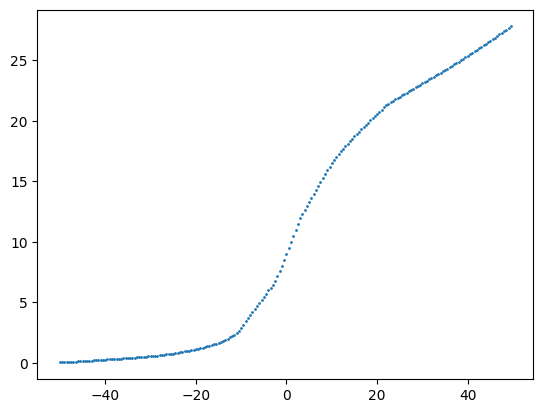

In [31]:
predictions2 = [(x, new_model.predict([x])) for x in np.arange(-50, 50, 0.5)]
pairs = list(zip(*predictions2))
plt.scatter(pairs[0], pairs[1], s=1)

# Three sets
Don't evaluate and fit in the same dataset:
* **Training set** - model learns from this data. Typically 70-80% of total available data
* **Validation set** - model gets tuned on this data. Typically 10-15% of total available data
* **Test set** - model gets evaluated on this data to test what it learnt. Typically 10-15% of total available data

In [12]:
new_X = [n + 50 for n in X]
X = np.concatenate((X, new_X))

In [13]:
new_X = [n + 100 for n in X]
X = np.concatenate((X, new_X))

In [14]:
new_y = [n + 20 for n in y]
y = np.concatenate((y, new_y))

In [15]:
new_y = [n + 40 for n in y]
y = np.concatenate((y, new_y))

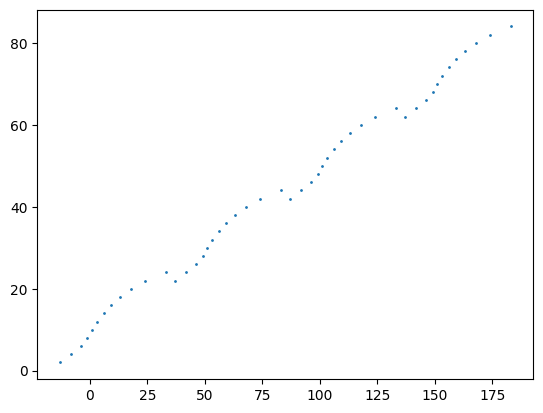

In [16]:
plt.scatter(X, y, s=1)

In [17]:
# split the data into train and test sets
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 8, 8)

# Visualizing the data

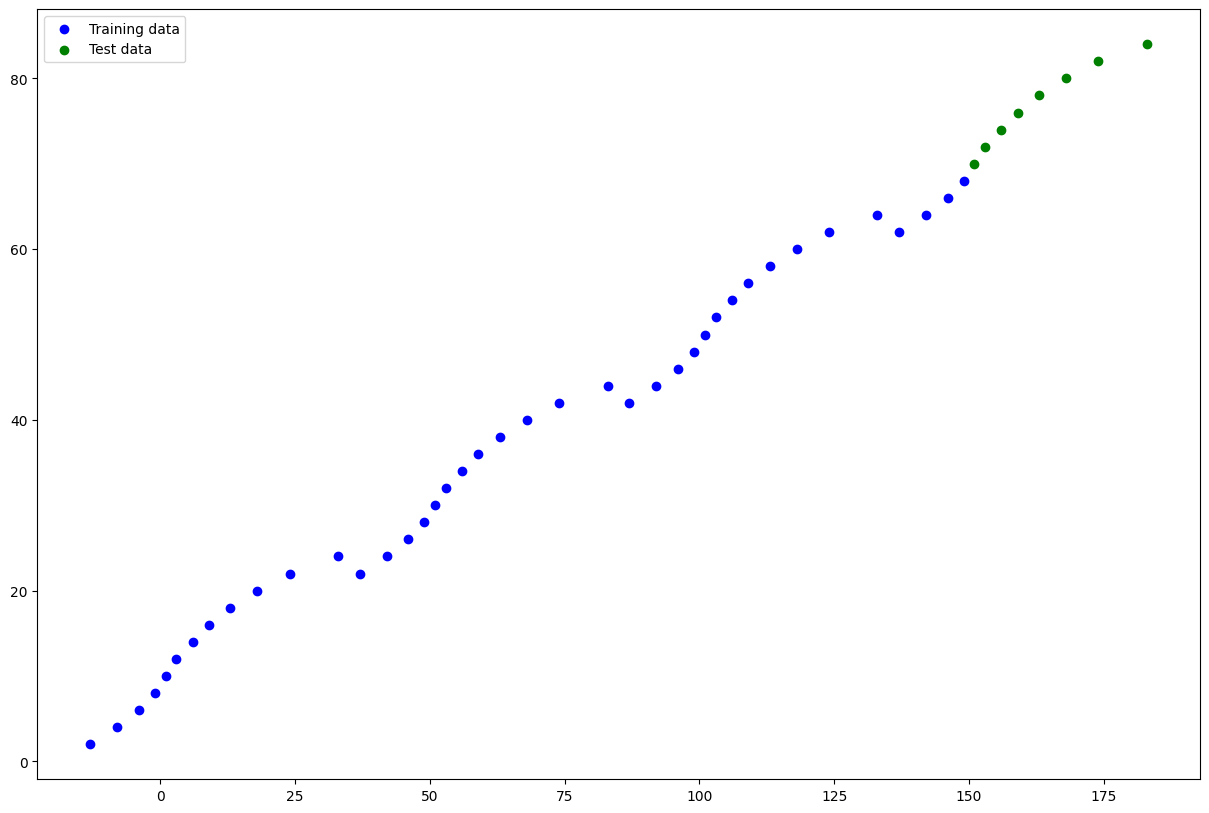

In [18]:
plt.figure(figsize=(15, 10))
plt.scatter(X_train, y_train, c="b", label="Training data")
plt.scatter(X_test, y_test, c="g", label="Test data")
plt.legend()

In [69]:
# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the new model
model.compile(loss=tf.keras.losses.mean_squared_error,
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
                  metrics=["mse"])

# 3. Fit the new model
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=1000)



Epoch 1/1000
2/2 [==============================] - 3s 11ms/step - loss: 1600.9388 - mse: 1600.9388
Epoch 2/1000
2/2 [==============================] - 0s 8ms/step - loss: 465.1694 - mse: 465.1694
Epoch 3/1000
2/2 [==============================] - 0s 10ms/step - loss: 139.8852 - mse: 139.8852
Epoch 4/1000
2/2 [==============================] - 0s 8ms/step - loss: 392.7268 - mse: 392.7268
Epoch 5/1000
2/2 [==============================] - 0s 8ms/step - loss: 162.9694 - mse: 162.9694
Epoch 6/1000
2/2 [==============================] - 0s 11ms/step - loss: 198.9598 - mse: 198.9598
Epoch 7/1000
2/2 [==============================] - 0s 15ms/step - loss: 59.2134 - mse: 59.2134
Epoch 8/1000
2/2 [==============================] - 0s 10ms/step - loss: 103.6414 - mse: 103.6414
Epoch 9/1000
2/2 [==============================] - 0s 8ms/step - loss: 96.1345 - mse: 96.1345
Epoch 10/1000
2/2 [==============================] - 0s 8ms/step - loss: 47.9938 - mse: 47.9938
Epoch 11/1000
2/2 [=========

1/1 [==============================] - 0s 48ms/step


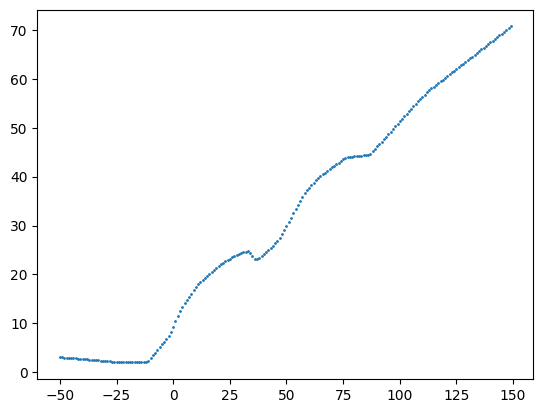

In [39]:
predictions2 = [(x, model.predict([x])) for x in range(-50, 150, 1)]
pairs = list(zip(*predictions2))
plt.scatter(pairs[0], pairs[1], s=1)